In [1]:
# Import the required libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# Step 1: Define the stock and download the data
# You can change 'AAPL' to any other stock ticker symbol
stock_ticker = 'AAPL'
start_date = '2020-01-01'
end_date = '2023-01-01'

In [5]:
# Download stock data from Yahoo Finance
stock_data = yf.download(stock_ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [6]:
# Display the first few rows of the data to ensure it's been downloaded correctly
print(stock_data.head())

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  74.059998  75.150002  73.797501  75.087502  72.876114  135480400
2020-01-03  74.287498  75.144997  74.125000  74.357498  72.167603  146322800
2020-01-06  73.447502  74.989998  73.187500  74.949997  72.742661  118387200
2020-01-07  74.959999  75.224998  74.370003  74.597504  72.400558  108872000
2020-01-08  74.290001  76.110001  74.290001  75.797501  73.565193  132079200


In [7]:
# Step 2: Calculate Moving Averages
# Define the window sizes for moving averages (you can customize these)
short_window = 20  # 20-day moving average
long_window = 50   # 50-day moving average

In [8]:
# Calculate short-term moving average (20 days)
stock_data['MA20'] = stock_data['Close'].rolling(window=short_window).mean()

# Calculate long-term moving average (50 days)
stock_data['MA50'] = stock_data['Close'].rolling(window=long_window).mean()

# Display the first few rows with the moving averages added
print(stock_data[['Close', 'MA20', 'MA50']].head())

                Close  MA20  MA50
Date                             
2020-01-02  75.087502   NaN   NaN
2020-01-03  74.357498   NaN   NaN
2020-01-06  74.949997   NaN   NaN
2020-01-07  74.597504   NaN   NaN
2020-01-08  75.797501   NaN   NaN


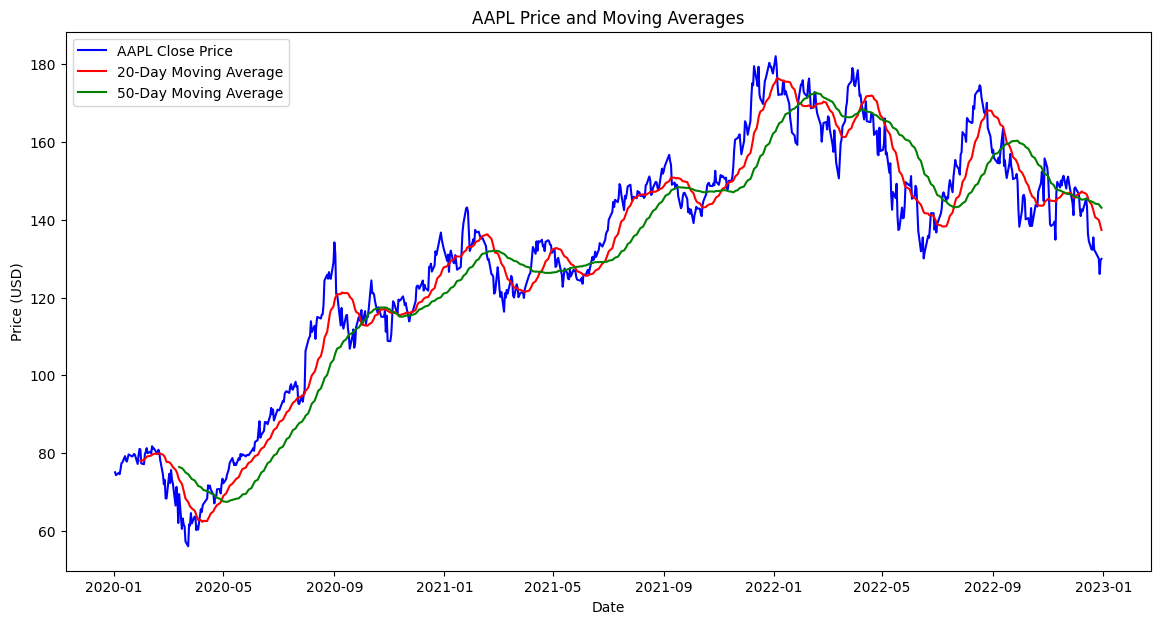

In [9]:
# Step 3: Plot the stock price and moving averages
plt.figure(figsize=(14, 7))

# Plot the closing price
plt.plot(stock_data['Close'], label=f'{stock_ticker} Close Price', color='blue')

# Plot the short-term moving average
plt.plot(stock_data['MA20'], label='20-Day Moving Average', color='red')

# Plot the long-term moving average
plt.plot(stock_data['MA50'], label='50-Day Moving Average', color='green')

# Adding title and labels
plt.title(f'{stock_ticker} Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()

# Show the plot
plt.show()

                 Close      MA20        MA50  Signal  Position
Date                                                          
2022-12-23  131.860001  140.6610  144.131800      -1       0.0
2022-12-27  130.029999  139.9515  143.964799      -1       0.0
2022-12-28  126.040001  139.1950  143.637399      -1       0.0
2022-12-29  129.610001  138.2740  143.354599      -1       0.0
2022-12-30  129.929993  137.3550  143.075999      -1       0.0


C:\Users\pthuk\AppData\Local\Temp\ipykernel_12716\886034155.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  stock_data['Signal'][short_window:] = np.where(stock_data['MA20'][short_window:] > stock_data['MA50'][short_window:], 1, -1)
C:\U

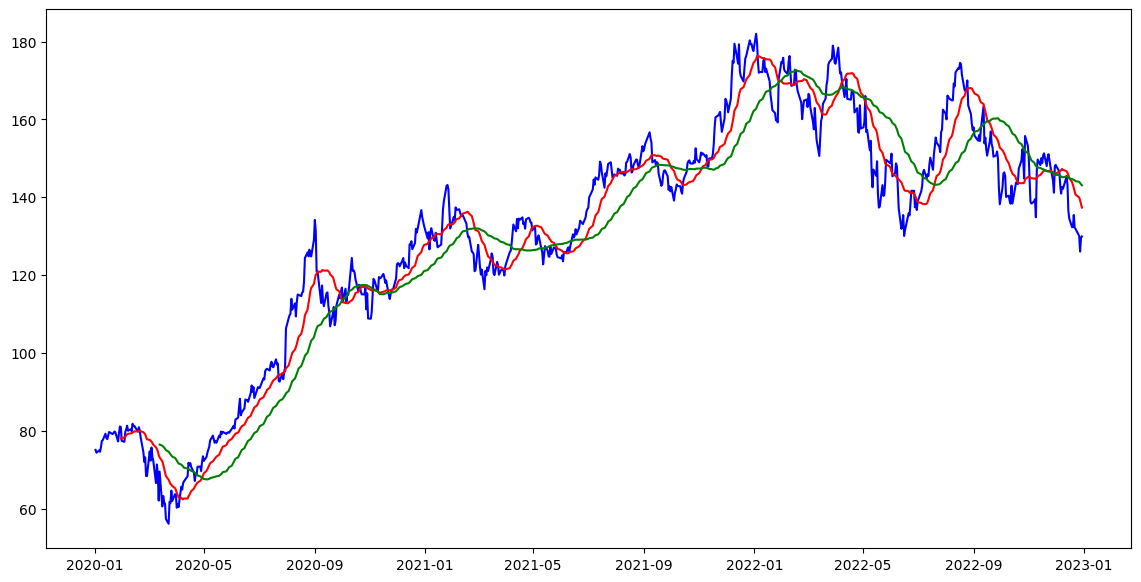

In [12]:
# Step 4: Add buy/sell signals (optional)
# We can add a simple strategy where we buy when the short MA crosses above the long MA and sell when it crosses below
stock_data['Signal'] = 0  # Initialize signal column
stock_data['Signal'][short_window:] = np.where(stock_data['MA20'][short_window:] > stock_data['MA50'][short_window:], 1, -1)

# Generate trading orders
stock_data['Position'] = stock_data['Signal'].diff()

# Display the trading signals
print(stock_data[['Close', 'MA20', 'MA50', 'Signal', 'Position']].tail())

# Plot the buy/sell signals on the stock price chart
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Close'], label=f'{stock_ticker} Close Price', color='blue')
plt.plot(stock_data['MA20'], label='20-Day Moving Average', color='red')
plt.plot(stock_data['MA50'], label='50-Day Moving Average', color='green')
